In [82]:
import copy
import json
import os
import geopandas as gpd
import pandas as pd
import plotly.express as px

px.set_mapbox_access_token(os.environ['MAPBOXKEY_CAVAX'])

lac_csa_geo = gpd.read_file('lac-csa.geojson')
lac_csa_geo.drop(columns=['OBJECTID', 'CITY_TYPE', 'LCITY', 'COMMUNITY',
                          'SOURCE', 'ShapeSTArea', 'ShapeSTLength'],
                 inplace=True)
lac_csa_geo.rename(columns={'LABEL': 'csa'}, inplace=True)

df = pd.read_csv('LA_County_Covid19_CSA_14day_case_death_table.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.rename(columns={'ep_date': 'date', 'geo_merge': 'csa'}, inplace=True)
df = df[df['date'].notna()]
df['case_14day_rate_avg'] = (df['case_14day_rate'] / 7).round(1)

gdf_cases = lac_csa_geo.merge(df[['csa', 'date', 'case_14day_rate_avg']],
                              on='csa')

In [95]:
selected_date = '2021-07-23'
gdf_cases_date = gdf_cases[gdf_cases['date']==selected_date].copy()
gdf_cases_date = gdf_cases_date.iloc[13:20]
gdf_cases_date.set_index('csa', inplace=True)

In [96]:
gdf_cases_date

,geometry,date,case_14day_rate_avg
csa,,,
City of Carson,"POLYGON ((-118.23562 33.86730, -118.23567 33.8...",2021-07-23,44.1
City of Cerritos,"POLYGON ((-118.02889 33.88263, -118.02998 33.8...",2021-07-23,20.3
City of Claremont,"POLYGON ((-117.71585 34.16538, -117.71835 34.1...",2021-07-23,18.9
City of Commerce,"POLYGON ((-118.12751 34.00811, -118.12756 34.0...",2021-07-23,47.0
City of Compton,"POLYGON ((-118.18717 33.90531, -118.18716 33.9...",2021-07-23,41.7
City of Covina,"POLYGON ((-117.90991 34.10673, -117.91404 34.1...",2021-07-23,28.9
City of Cudahy,"POLYGON ((-118.16909 33.96381, -118.16984 33.9...",2021-07-23,29.3


In [97]:
gdf_cases_date.index

Index(['City of Carson', 'City of Cerritos', 'City of Claremont',
       'City of Commerce', 'City of Compton', 'City of Covina',
       'City of Cudahy'],
      dtype='object', name='csa')

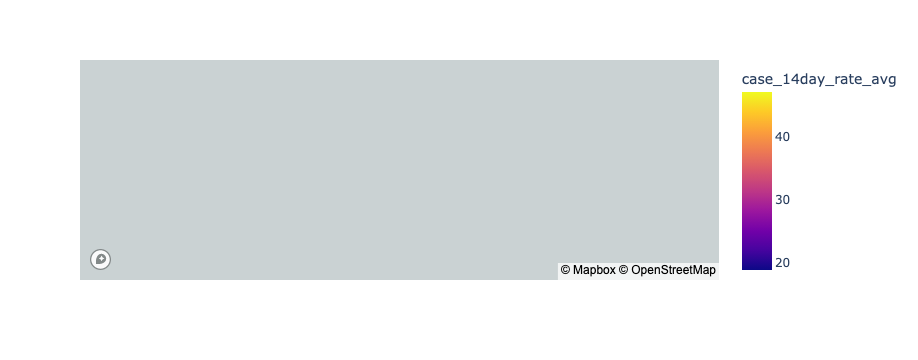

In [99]:
fig = px.choropleth_mapbox(gdf_cases_date,
                           geojson=gdf_cases_date.geometry,
                           locations=gdf_cases_date.index,
                           color='case_14day_rate_avg',
                          )
fig.show()